In [1]:
# Let's start with a simple example of the scikit lib use

import sys
sys.path.append('./privatizers')
sys.path.append('./dataProviders')
sys.path.append('./adapters')

from sklearn import tree
from sklearn.datasets import fetch_covtype
from adapters import generalAdapter as adapter
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

dp = fetch_covtype()
X = dp.data
Y = dp.target

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

print(sum(X[:,0]) / len(X[:,0]))


2959.365300544567


In [2]:
## Dataset
data_set = {
    'samples': X_train,
    'labels': y_train
}

## Size adjustment
MAX_SIZE = len(data_set['samples'])
desired_size = 10000
size = min(desired_size, MAX_SIZE)

data_set['samples'] = data_set['samples'][:size]
data_set['labels'] = data_set['labels'][:size]

In [3]:
## Decision tree without privatization
clf = tree.DecisionTreeClassifier()
# clf = clf.fit(data_set['samples'], data_set['labels'])

# tree.plot_tree(clf.fit(data_set['samples'], data_set['labels']))
clf.fit(data_set['samples'], data_set['labels'])
# tree.export_graphviz(clf, out_file='tree.dot')

y_pred = clf.predict(X_test)

print("Accuracy is", accuracy_score(y_test,y_pred)*100)

Accuracy is 72.53419313383513


In [15]:
## Privatization: Laplace privatizer
from privatizers import laplacePrivatizer
ad = adapter.GeneralAdapter(10, 1)
scale = 0.05
privatizer = laplacePrivatizer.LaplacePrivatizer(scale)
privateData = privatizer.privatize(ad.fromRaw(data_set['samples']))

privateTargetsFloat = privatizer.privatize(ad.fromRaw(data_set['labels']))
privateTargets = ad.toDiscreteValue(privateTargetsFloat)

clf = tree.DecisionTreeClassifier()
clf.fit(privateData, privateTargets)
y_pred = clf.predict(X_test)

# tree.export_graphviz(clf, out_file='tree_laplace s=0,03 size=100.dot') 

print("Accuracy is", accuracy_score(y_test,y_pred)*100)

Accuracy is 66.58137506884523


Accuracy is 33.1145584725537


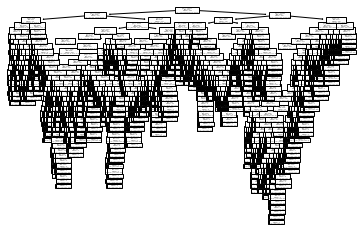

In [16]:
## Privatization: Exponential privatizer
from privatizers import exponentialPrivatizer

# scale = 100.
privatizer = exponentialPrivatizer.ExponentialPrivatizer(scale)
privateData = privatizer.privatize(ad.fromRaw(data_set['samples']))

privateTargetsFloat = privatizer.privatize(ad.fromRaw(data_set['labels']))
privateTargets = ad.toDiscreteValue(privateTargetsFloat)

clf = tree.DecisionTreeClassifier()

tree.plot_tree(clf.fit(privateData, privateTargets))
clf.fit(privateData, privateTargets)
y_pred = clf.predict(X_test)

# tree.export_graphviz(clf, out_file='tree_exponential s=0,03 size=100.dot') 

print("Accuracy is", accuracy_score(y_test,y_pred)*100)
